In [63]:
! pip install -q pandas numpy matplotlib seaborn scikit-learn wordcloud


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip


In [3]:
import pandas as pd

df = pd.read_csv('Kasha-Technology-Sprint-Backlog.csv')
df.head()


,Unnamed: 0,USER STORY NAME,USER STORY DESCRIPTION INCL. EXPECTED OUTCOME,BUSINESS PRIORITY,USER STORY TYPE,USER ACCEPTANCE CRITERIA (UAT)\n\n,ESTIMATES,OWNER,SPRINT7,TARGET DATE,...,Test Scenario #2,Test Scenario #3,Business Value Type,Business Value Description,COMMENT,Demo Order,DEPLOYMENT,MONITORING AND FEEDBACK\n\n,"Sponsor (KASHA, EJAF, ROCHE, KASHA, RMS, AMEX, DELL)","Value Stream (AI Services, IoT Services, Data Servcies, Core Services, Support & Architecure)"
0,1,CONSUMER APP AT4T - APP TEMPLATE,"As a developer, I want to create a prototype a...",HIGH,FEATURE,WORKING SOFTWARE,36.0,Pamphile,CW 23,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,CONSUMER APP AT4T -CORE WORKFLOWS & DATA ATTR...,"As a business/operational analyst, I want to c...",HIGH,ENABLER,1. WORKFLOWS & MOCK-UPS\n2. RESULT OF SQL QUER...,16.0,Jambu,CW 23,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,CONSUMER APP AT4T - HEALTH INFO WORKFLOW & DATA,"As a commercial analyst, I want to develop a d...",HIGH,ENABLER,1. WORKFLOW & MOCK-UP\n2. SNIPPET / EXAMPLE OF...,8.0,Clemence,CW 23,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,CONSUMER APP AT4T - ABOUT KASHA & CONTACT SUP...,"As a commercial analyst, I want to develop a d...",HIGH,ENABLER,1. WORKFLOW & MOCK-UP\n2. SNIPPET / EXAMPLE OF...,8.0,Clemence,CW 23,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,CONSUMER APP AT4T - SPRINT CW 24 BACKLOG,"As a Product Owner, I want to create the sprin...",HIGH,ENABLER,User Stories accepted,16.0,Marco,CW 23,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
# Check the exact column names
print(df.columns.tolist())

# Remove leading/trailing spaces from column names
df.columns = df.columns.str.strip()


['Unnamed: 0', 'USER STORY NAME', 'USER STORY DESCRIPTION INCL. EXPECTED OUTCOME', 'BUSINESS PRIORITY', 'USER STORY TYPE', 'USER ACCEPTANCE CRITERIA (UAT)', 'ESTIMATES', 'OWNER', 'SPRINT7', 'TARGET DATE', 'DEMO STATUS', 'SUMMARY of QUALITY ASSURANCE / UAT TESTING', 'Business Owner / Requestor', 'Test Scenario #2', 'Test Scenario #3', 'Business Value Type', 'Business Value Description', 'COMMENT', 'Demo Order', 'DEPLOYMENT', 'MONITORING AND FEEDBACK', 'Sponsor (KASHA, EJAF, ROCHE, KASHA, RMS, AMEX, DELL)', 'Value Stream (AI Services, IoT Services, Data Servcies, Core Services, Support & Architecure)']


In [14]:
df['SPRINT7'].unique()

array(['CW 23', 'CW 28', 'CW 24', 'Product Backlog', 'CW 25', 'CW 26',
       'CW 27', 'CW 29', 'CW 30', 'CW 32', 'CW 33', 'CW 39', 'CW 31',
       'CW 46', 'CW 34', 'CW 36', 'CW 37', 'CW 35', 'CW 47', 'CW 50',
       'CW 45', 'CW 53', 'CW 40', 'CW 38', 'CW 41', 'CW 42', 'CW 44',
       'CW 43', 'CW 48', 'CW 49', 'CW 51', 'CW 52', 'CW 01 2025',
       'CW 02 2025', 'CW 07 2025', 'CW 03 2025', 'CW 04 2025',
       'CW 05 2025', 'CW 06 2025', nan, 'CW 14 2025', 'CW 08 2025',
       'CW 09 2025', 'CW 10 2025', 'CW 12 2025', 'CW 11 2025',
       'CW 13 2025', 'CW 15 2025', 'CW 16 2025', 'CW 18 2025',
       'CW 19 2025', 'CW 17 2025', 'CW20 2025', 'CW 20 2025',
       'CW 21 2025', 'CW 22 2025', 'CW 23 2025', 'CW 24 2025',
       'CW 25 2025'], dtype=object)

In [15]:
weeks_of_interest = ['CW 01 2025',
       'CW 02 2025', 'CW 07 2025', 'CW 03 2025', 'CW 04 2025',
       'CW 05 2025', 'CW 06 2025', 'CW 14 2025', 'CW 08 2025',
       'CW 09 2025', 'CW 10 2025', 'CW 12 2025', 'CW 11 2025',
       'CW 13 2025', 'CW 15 2025', 'CW 16 2025', 'CW 18 2025',
       'CW 19 2025', 'CW 17 2025', 'CW20 2025', 'CW 20 2025',
       'CW 21 2025', 'CW 22 2025', 'CW 23 2025', 'CW 24 2025']

In [21]:
# if the entry's SPRINT7 is in weeks_of_interest, and if the USER STORY TYPE is SUPPORT, and the story is ACCEPTED, then keep it
df_filtered = df[(df['SPRINT7'].isin(weeks_of_interest)) & (df['USER STORY TYPE'] == 'SUPPORT') & (df['DEMO STATUS'] == 'ACCEPTED')]
# Display the filtered DataFrame
print(df_filtered.shape)

(162, 23)


In [28]:
import re

# derive an integer week number (1-53) from strings like "CW 05 2025" or "CW20 2025"
df_filtered['week'] = (
    df_filtered['SPRINT7']
    .str.extract(r'CW\s*0?(\d{1,2})\s*2025', expand=False)
    .astype(int)
)

# sanity-check
print(df_filtered[['SPRINT7', 'week']])

         SPRINT7  week
637   CW 02 2025     2
653   CW 04 2025     4
659   CW 05 2025     5
662   CW 06 2025     6
669   CW 04 2025     4
...          ...   ...
1375  CW 21 2025    21
1392  CW 22 2025    22
1393  CW 22 2025    22
1432  CW 23 2025    23
1445  CW 23 2025    23

[162 rows x 2 columns]


/var/folders/pd/kdv6pdz13d18wqhtqkwbn8080000gn/T/ipykernel_7688/210123464.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['week'] = (


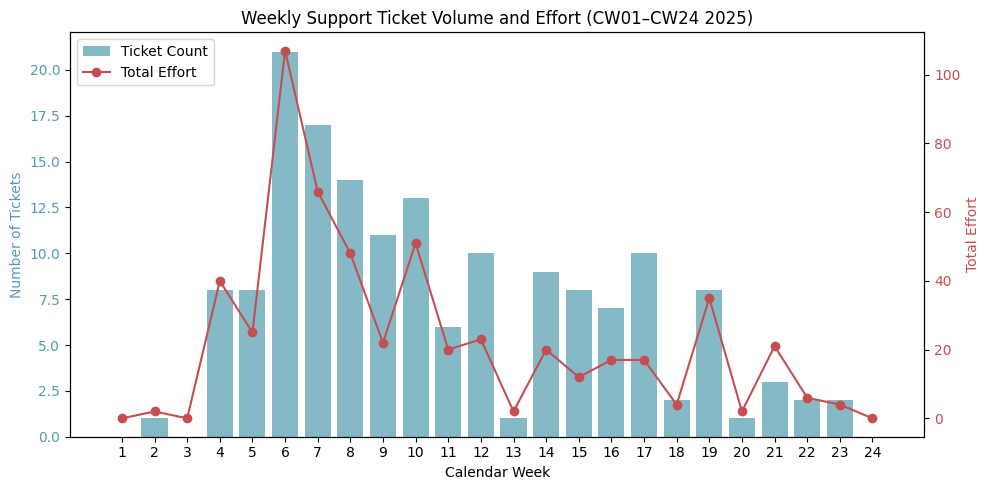

In [60]:
import matplotlib.pyplot as plt

# Prepare data
weekly_counts = (
    df_filtered.groupby('week')
               .size()
               .reindex(range(1, 25), fill_value=0)
)
weekly_effort = (
    df_filtered.groupby('week')['ESTIMATES']
    .sum()
    .reindex(range(1, 25), fill_value=0)
)

fig, ax1 = plt.subplots(figsize=(10,5))

# Bar plot for weekly ticket counts (primary y-axis)
color_bars = '#539caf'
ax1.bar(weekly_counts.index, weekly_counts.values, color=color_bars, alpha=0.7, label='Ticket Count')
ax1.set_xlabel('Calendar Week')
ax1.set_ylabel('Number of Tickets', color=color_bars)
ax1.tick_params(axis='y', labelcolor=color_bars)
ax1.set_xticks(range(1,25))

# Create second y-axis for effort
ax2 = ax1.twinx()
color_line = '#c44e52'
ax2.plot(weekly_effort.index, weekly_effort.values, color=color_line, marker='o', label='Total Effort')
ax2.set_ylabel('Total Effort', color=color_line)
ax2.tick_params(axis='y', labelcolor=color_line)

# Title and legends
plt.title('Weekly Support Ticket Volume and Effort (CW01–CW24 2025)')
fig.tight_layout()

# Combine legends from both axes
bars_legend = ax1.get_legend_handles_labels()
line_legend = ax2.get_legend_handles_labels()
ax1.legend(bars_legend[0] + line_legend[0], bars_legend[1] + line_legend[1], loc='upper left')

plt.show()

OWNER
Gael               56
Emmanuel Ratemo    43
Eva                35
Lydia              11
Chanzu              8
Honore              4
Larry               2
Kseniia             1
Naveen              1
Jacob               1
Name: count, dtype: int64


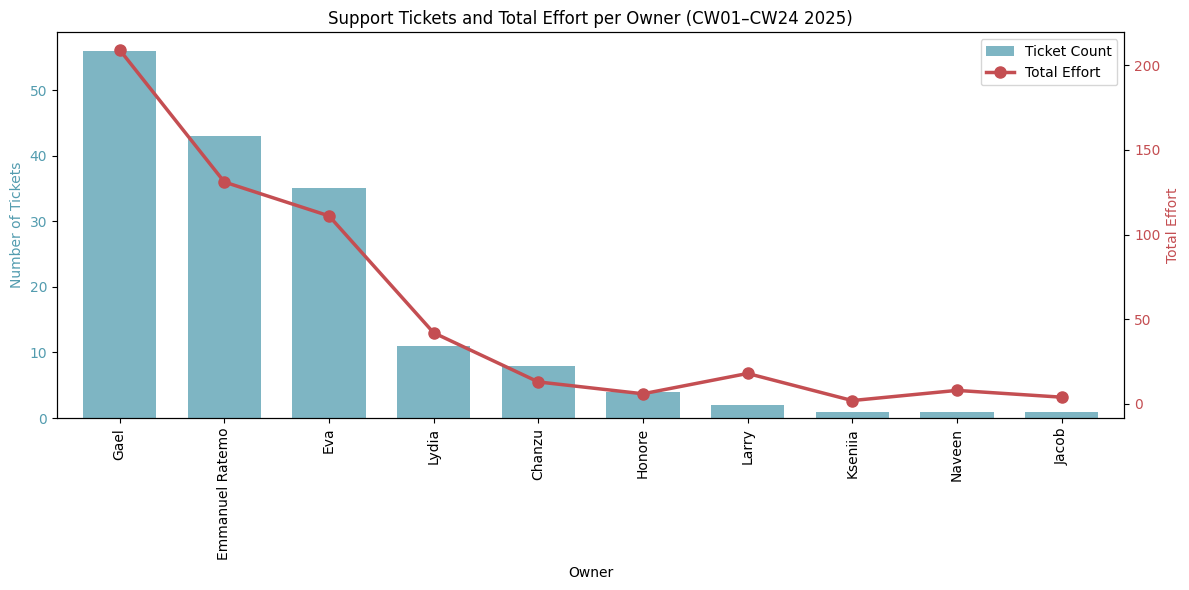

In [75]:
import matplotlib.pyplot as plt

# Ticket counts by owner
owner_counts = df_filtered['OWNER'].value_counts()

print(owner_counts)
# Effort sums by owner, aligned with order of ticket counts
owner_effort = df_filtered.groupby('OWNER')['ESTIMATES'].sum()
owner_effort = owner_effort.reindex(owner_counts.index)

fig, ax1 = plt.subplots(figsize=(12,6))

color_bar = '#539caf'
color_line = '#c44e52'

# Bar plot: ticket counts per owner
owner_counts.plot(kind='bar', ax=ax1, color=color_bar, alpha=0.75, width=0.7, label='Ticket Count')
ax1.set_xlabel('Owner')
ax1.set_ylabel('Number of Tickets', color=color_bar)
ax1.tick_params(axis='y', labelcolor=color_bar)

# Second y-axis: effort per owner
ax2 = ax1.twinx()
owner_effort.plot(marker='o', ax=ax2, color=color_line, linewidth=2.5, markersize=8, label='Total Effort')
ax2.set_ylabel('Total Effort', color=color_line)
ax2.tick_params(axis='y', labelcolor=color_line)

# Legend combining both plots
lines_labels = [ax.get_legend_handles_labels() for ax in [ax1, ax2]]
lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]
ax1.legend(lines, labels, loc='upper right')

plt.title('Support Tickets and Total Effort per Owner (CW01–CW24 2025)')
plt.tight_layout()
plt.show()

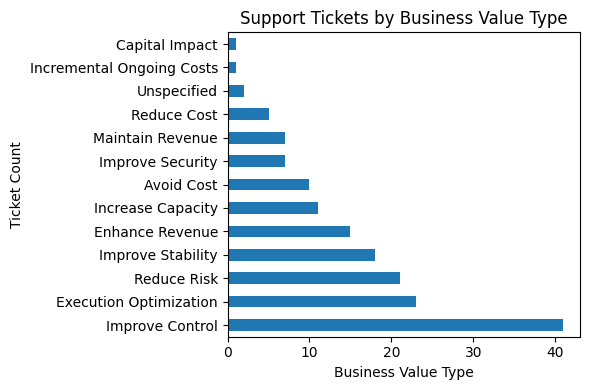

In [51]:
import matplotlib.pyplot as plt

value_counts = (
    df_filtered['Business Value Type']
    .fillna('Unspecified')
    .value_counts()
    .sort_values(ascending=False)
)

plt.figure(figsize=(6,4))
value_counts.plot(kind='barh')
plt.title('Support Tickets by Business Value Type')
plt.xlabel('Business Value Type')
plt.ylabel('Ticket Count')
plt.tight_layout()
plt.show()

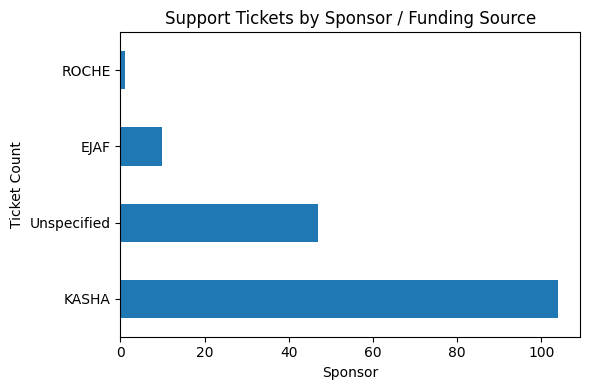

In [40]:
import matplotlib.pyplot as plt

# find the Sponsor column
sponsor_cols = [c for c in df_filtered.columns if 'Sponsor' in c]
if not sponsor_cols:
    raise KeyError("No column containing 'Sponsor' found")
sponsor_col = sponsor_cols[0]

# plot
sponsor_counts = (
    df_filtered[sponsor_col]
     .fillna('Unspecified')
     .value_counts()
     .sort_values(ascending=False)
)

plt.figure(figsize=(6,4))
sponsor_counts.plot(kind='barh')
plt.title('Support Tickets by Sponsor / Funding Source')
plt.xlabel('Sponsor')
plt.ylabel('Ticket Count')
plt.tight_layout()
plt.show()

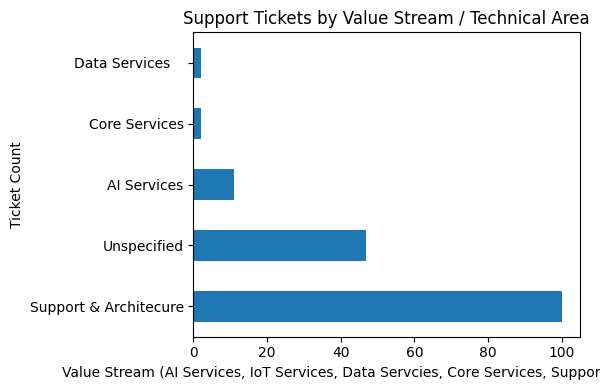

In [50]:
import matplotlib.pyplot as plt

# find the Value Stream column
stream_cols = [c for c in df_filtered.columns if 'Value Stream' in c or 'Stream' in c]
if not stream_cols:
    raise KeyError("No column containing 'Value Stream' or 'Stream' found")
stream_col = stream_cols[0]

# plot
stream_counts = (
    df_filtered[stream_col]
     .fillna('Unspecified')
     .value_counts()
     .sort_values(ascending=False)
)

plt.figure(figsize=(6,4))
stream_counts.plot(kind='barh')
plt.title('Support Tickets by Value Stream / Technical Area')
plt.xlabel(stream_col)
plt.ylabel('Ticket Count')
plt.tight_layout()
plt.show()

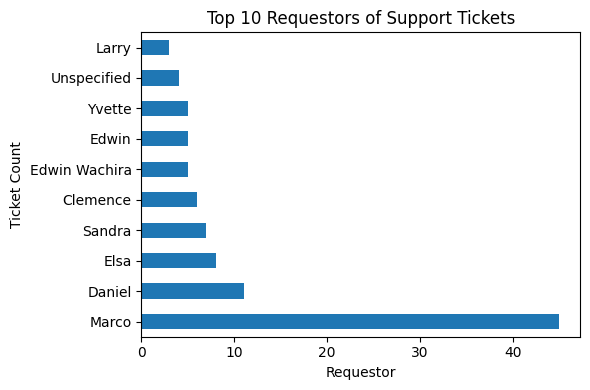

In [61]:
import matplotlib.pyplot as plt

req_counts = (
    df_filtered['Business Owner / Requestor']
    .fillna('Unspecified')
    .value_counts()
    .head(10)
)

plt.figure(figsize=(6,4))
req_counts.plot(kind='barh')
plt.title('Top 10 Requestors of Support Tickets')
plt.xlabel('Requestor')
plt.ylabel('Ticket Count')
plt.tight_layout()
plt.show()

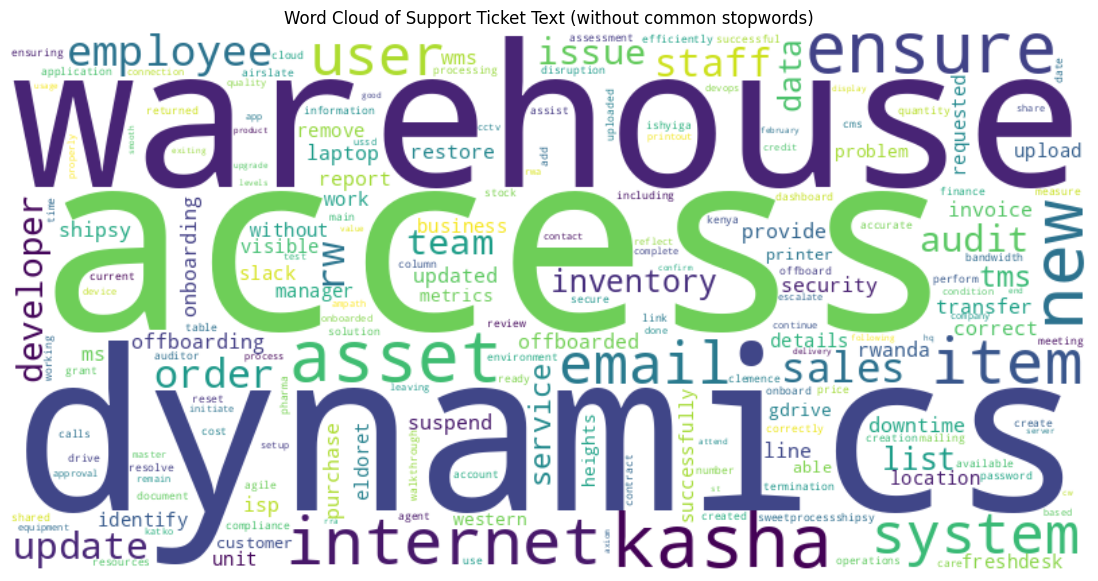

In [70]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
from sklearn.feature_extraction.text import CountVectorizer
import re

# 1. Combine text from relevant columns into one series
text_data = (
    df_filtered['USER STORY NAME'].fillna('') + ' ' +
    df_filtered['USER STORY DESCRIPTION INCL. EXPECTED OUTCOME'].fillna('') + ' ' +
    df_filtered['USER ACCEPTANCE CRITERIA (UAT)'].fillna('')
)

# 2. Clean text function
def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)  # remove punctuation and numbers
    return text

cleaned_text = text_data.apply(clean_text)

# Combine all into a single string corpus
corpus = ' '.join(cleaned_text)

# 3. Generate word cloud excluding common stopwords
stopwords = set(STOPWORDS)
stopwords.update(['want', 'support', 'engineer'])
wordcloud = WordCloud(width=800, height=400, background_color='white',
                      stopwords=stopwords, collocations=False).generate(corpus)

plt.figure(figsize=(15,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Support Ticket Text (without common stopwords)')
plt.show()


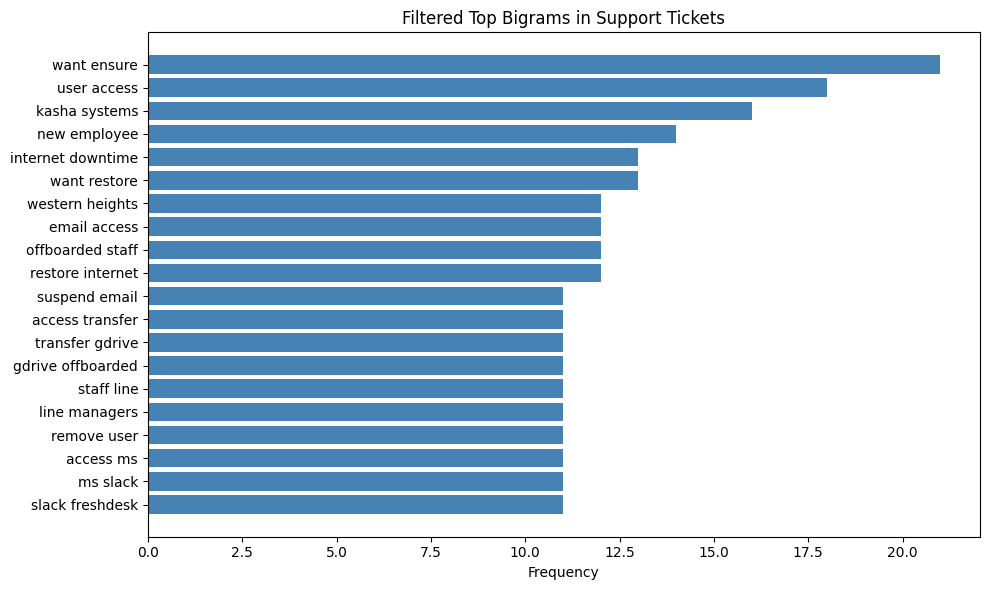

In [74]:

# 4. Function to get top n-grams
def get_top_ngrams(text_series, ngram=2, n=20):
    vec = CountVectorizer(ngram_range=(ngram, ngram),
                          stop_words='english').fit(text_series)
    bag_of_words = vec.transform(text_series)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    return words_freq[:n]

# Extract top bigrams and trigrams from cleaned text
top_bigrams = get_top_ngrams(cleaned_text, ngram=2, n=50)
top_trigrams = get_top_ngrams(cleaned_text, ngram=3, n=50)

# 5. Function to filter out boilerplate patterns from n-grams
def filter_ngrams(ngrams_list, exclude_patterns):
    filtered = []
    for phrase, count in ngrams_list:
        if any(pat in phrase for pat in exclude_patterns):
            continue
        filtered.append((phrase, count))
    return filtered

# Boilerplate phrases to exclude from n-grams
exclude_patterns = [
    'support engineer want',
    'developer want',
    'engineer want',
    'support engineer',
    'developer want to',
    'engineer want to',
]

# Filter bigrams and trigrams
filtered_bigrams = filter_ngrams(top_bigrams, exclude_patterns)
filtered_trigrams = filter_ngrams(top_trigrams, exclude_patterns)

# 6. Plotting function for n-grams
def plot_ngrams(ngrams_list, title, top_n=20):
    phrases = [phrase for phrase, count in ngrams_list[:top_n]][::-1]  # reverse for horizontal bars
    counts = [count for phrase, count in ngrams_list[:top_n]][::-1]

    plt.figure(figsize=(10,6))
    plt.barh(phrases, counts, color='steelblue')
    plt.title(title)
    plt.xlabel('Frequency')
    plt.tight_layout()
    plt.show()

# Plot filtered bigrams and trigrams
plot_ngrams(filtered_bigrams, 'Filtered Top Bigrams in Support Tickets')


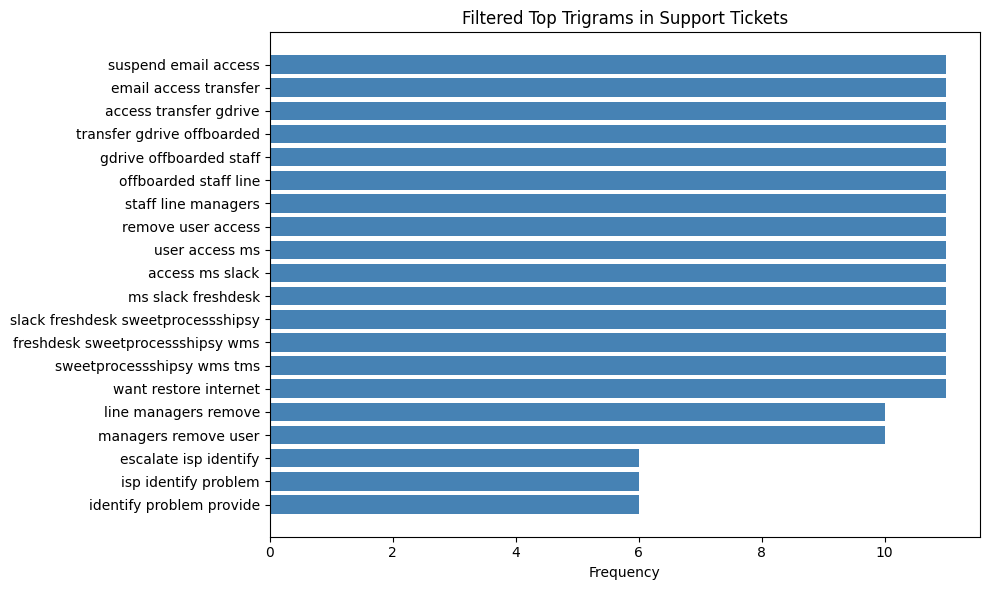

In [73]:
plot_ngrams(filtered_trigrams, 'Filtered Top Trigrams in Support Tickets')